# Conhecendo os dados

In [1]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
dataset.shape

(1338, 7)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
set(dataset['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [5]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Transformando variáveis categóricas em numéricas

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()

dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
dataset['smoker'] = labelencoder.fit_transform(dataset['smoker'])

onehotencoder = OneHotEncoder()

region_encoded = onehotencoder.fit_transform(dataset['region'].values.reshape(-1,1)).toarray()

region_df = pd.DataFrame(region_encoded, columns = ['northeast', 'northwest', 'southeast', 'southwest'])

dataset = pd.concat([dataset, region_df], axis=1)

dataset.drop('region', axis=1, inplace=True)

dataset.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [10]:
dataset.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Analisando outliers

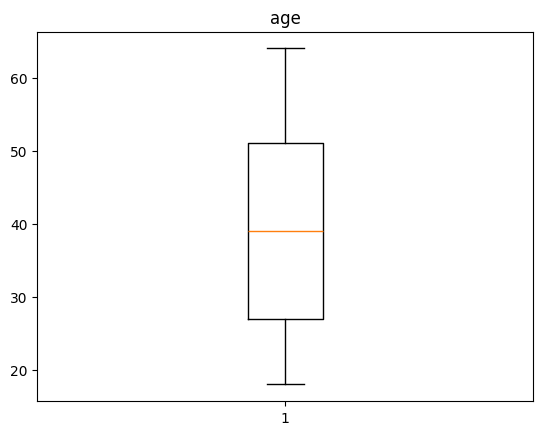

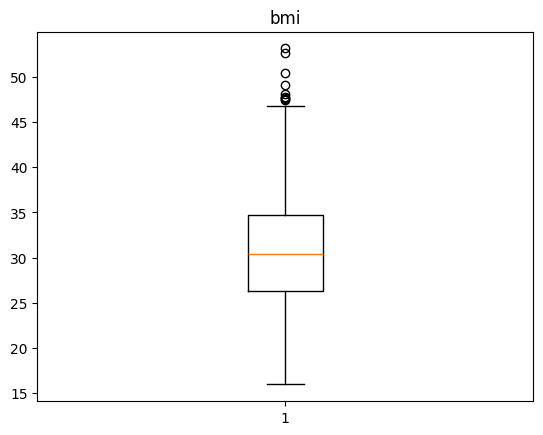

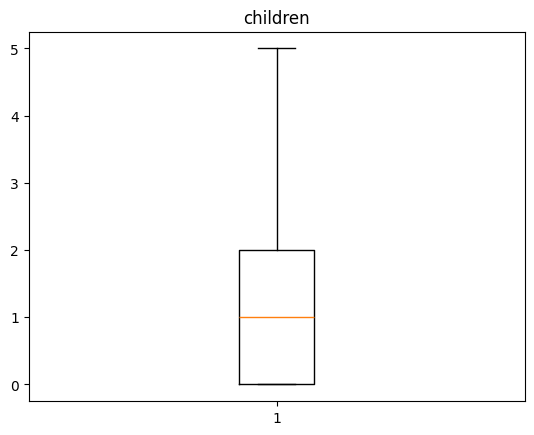

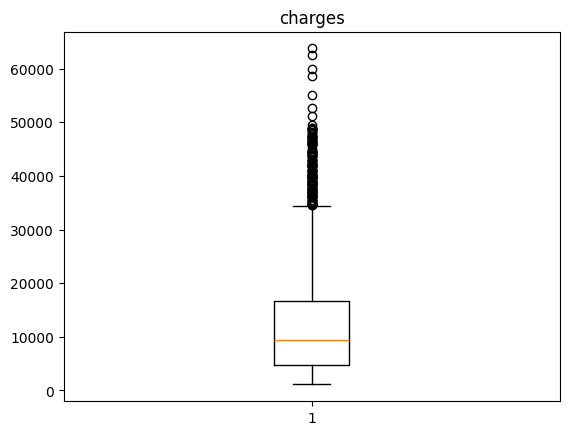

In [11]:
import matplotlib.pyplot as plt

for column in ['age', 'bmi', 'children', 'charges']:
    plt.boxplot(dataset[column])
    plt.title(column)
    plt.show()

### Tratando outliers com a técnica de IQR (Interquartile Range)

In [12]:
# Q1 = dataset['charges'].quantile(0.25)
# Q3 = dataset['charges'].quantile(0.75)
# IQR = Q3 - Q1

# dataset = dataset[(dataset['charges'] >= (Q1 - 1.5 * IQR)) & (dataset['charges'] <= (Q3 + 1.5 * IQR))]

# dataset.head()

## Analisando correlações

In [13]:
corr_matrix = dataset.corr()

corr_matrix['charges'].sort_values(ascending=False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
sex          0.057292
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
Name: charges, dtype: float64

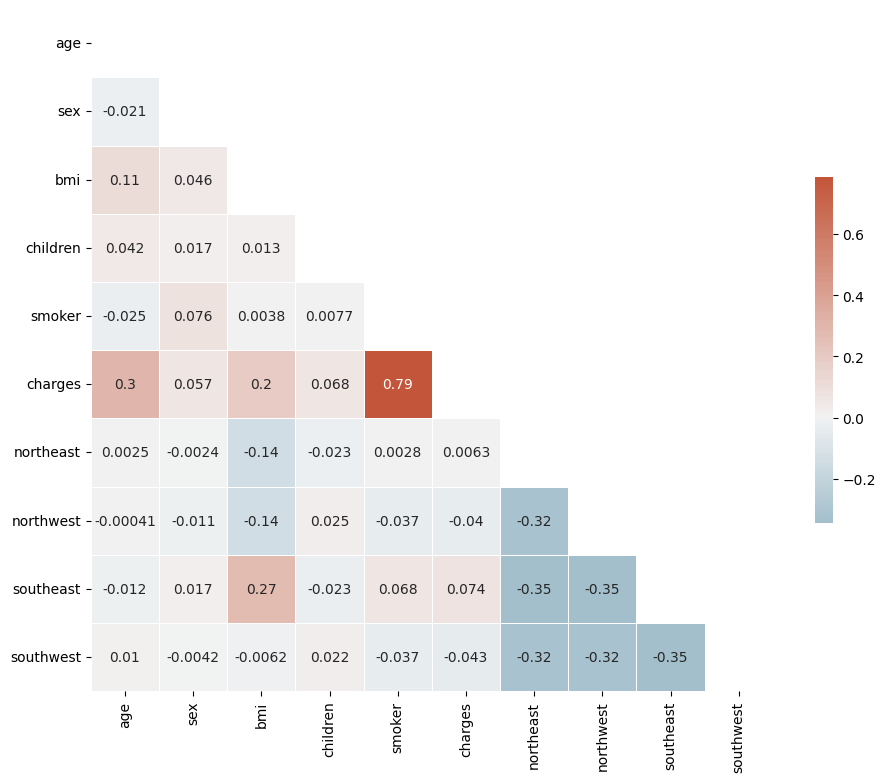

In [14]:
import numpy as np
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Separando base de treino e teste com estratificação

In [15]:
from sklearn.model_selection import train_test_split

X = dataset[['age','bmi', 'children', 'smoker']]
y = dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=dataset['smoker'])

print(X_train['smoker'].value_counts() / len(X_train))
print(X_test['smoker'].value_counts() / len(X_test))

smoker
0    0.795327
1    0.204673
Name: count, dtype: float64
smoker
0    0.794776
1    0.205224
Name: count, dtype: float64


## Aplicando normalização

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['age','bmi', 'children']] = scaler.fit_transform(X_train[['age','bmi', 'children']])
X_test[['age','bmi', 'children']] = scaler.transform(X_test[['age','bmi', 'children']])

In [17]:
X_train.describe()

,age,bmi,children,smoker
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.459386,0.398394,0.221308,0.204673
std,0.305172,0.162660,0.242057,0.403651
min,0.000000,0.000000,0.000000,0.000000
25%,0.179348,0.281780,0.000000,0.000000
50%,0.456522,0.391041,0.200000,0.000000
75%,0.717391,0.501480,0.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [18]:
X_test.describe()

,age,bmi,children,smoker
count,268.000000,268.000000,268.000000,268.000000
mean,0.467554,0.384304,0.209701,0.205224
std,0.306962,0.169386,0.237455,0.404621
min,0.000000,0.023002,0.000000,0.000000
25%,0.195652,0.262039,0.000000,0.000000
50%,0.467391,0.374092,0.200000,0.000000
75%,0.739130,0.504641,0.400000,0.000000
max,1.000000,0.854991,1.000000,1.000000


# Testando modelos de regressão

### Regressão Linear

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


y_pred_lin_reg = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred_lin_reg)

lin_rmse = np.sqrt(lin_mse)

lin_rmse

5571.369083274044

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred_lin_reg)

lin_mae

3873.697236144735

In [21]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_lin_reg)

0.7896054282061097

In [22]:
np.mean(np.abs((y_test - y_pred_lin_reg) / y_test)) * 100

38.85428972110475

### Árvore de Decisão

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

y_pred_tree_reg = tree_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred_tree_reg)

tree_rmse = np.sqrt(tree_mse)

tree_rmse

6291.291734362999

In [24]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred_tree_reg)

lin_mae

3031.8137155223876

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_tree_reg)

0.7317187508500089

In [26]:
np.mean(np.abs((y_test - y_pred_tree_reg) / y_test)) * 100

36.438610483650926

### Floresta Aleatória

In [27]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=130, random_state=42)

forest_reg.fit(X_train, y_train)

y_pred_forest_reg = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, y_pred_forest_reg)

forest_rmse = np.sqrt(forest_mse)

forest_rmse

4795.673742830334

In [28]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred_forest_reg)

lin_mae

2742.980837897672

In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_forest_reg)

0.8441129888079135

In [30]:
np.mean(np.abs((y_test - y_pred_forest_reg) / y_test)) * 100

36.85940353770753